Importing Libraries

In [ ]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
from math import acos, degrees
from scipy import spatial
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.metrics.pairwise import cosine_similarity
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


#Reading in the data as adult dataframe
autism = pd.read_csv("https://raw.githubusercontent.com/rupreti77/upreti_IT533/main/csv_result-Autism-Adult-Data.csv")

#Verifying that we can see the data
autism.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [ ]:
autism4=autism 
autism4.ethnicity.replace('?','unknown', inplace=True)
autism4.relation.replace('?','unknown', inplace=True)
autism4

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,0,40,f,unknown,no,no,Egypt,no,2,18 and more,unknown,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,700,0,1,0,1,1,0,1,1,1,1,25,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,701,1,0,0,0,0,0,0,1,0,1,34,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,702,1,0,1,1,1,0,1,1,0,1,24,f,unknown,no,no,Russia,no,7,18 and more,unknown,YES
702,703,1,0,0,1,1,0,1,0,1,1,35,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO


In [ ]:
autism5=autism4
nan_value = float("NaN")
autism5.replace("?", nan_value, inplace=True)
autism5.dropna(inplace=True)
autism5["age"] = pd.to_numeric(autism5["age"], downcast="float")
autism5.age.describe()
autism5

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,0,40.0,f,unknown,no,no,Egypt,no,2,18 and more,unknown,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,700,0,1,0,1,1,0,1,1,1,1,25.0,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,701,1,0,0,0,0,0,0,1,0,1,34.0,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,702,1,0,1,1,1,0,1,1,0,1,24.0,f,unknown,no,no,Russia,no,7,18 and more,unknown,YES
702,703,1,0,0,1,1,0,1,0,1,1,35.0,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO


In [ ]:
#Let's drop the value of the age which is equal to 383 at the line 52
autism5.loc[autism5['age']==383]


,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
52,53,1,0,0,0,0,0,0,0,0,0,383.0,f,Pasifika,no,no,New Zealand,no,1,18 and more,Self,NO


In [ ]:
autism5=autism5.drop(52)

In [ ]:
autism5.age.describe()

count    701.000000
mean      29.194008
std        9.711530
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max       64.000000
Name: age, dtype: float64

#Selection of the dependent variable in the dataset

In [ ]:
autism5.contry_of_res.replace(['United States','Canada', 'Mexico'],'North_America', inplace=True)
autism5.contry_of_res.replace(['Argentina','Brazil','Bahamas', 'Chile','Costa Rica','Nicaragua','Uruguay','Ecuador','Bolivia','Aruba'],'South_America', inplace=True)
autism5.contry_of_res.replace(['Egypt','Burundi', 'United Kingdom','South Africa','Sierra Leone', 'Ethiopia','Niger','Angola'],'Africa', inplace=True)
autism5.contry_of_res.replace(['Afghanistan','Jordan','Bangladesh','China','India','Lebanon','Philippines','Hong Kong', 'Japan', 'Sri Lanka','Iraq','Viet Nam', 'Malaysia', 'Nepal', 'Indonesia','Turkey','Iran','Saudi Arabia','Azerbaijan','Pakistan','Kazakhstan','Oman','United Arab Emirates'],'Asia', inplace=True)
autism5.contry_of_res.replace([ 'Austria','Spain', 'Ireland', 'United Kingdom','Italy','France','Netherlands', 'Romania', 
                            'Sweden','Germany','Russia','Armenia','Iceland','Ukraine','Serbia', 'Portugal','Belgium',
                            'Finland', 'Czech Republic', 'Cyprus'],'Europe', inplace=True)
autism5.contry_of_res.replace(['New Zealand','Australia', 'Tonga', 'AmericanSamoa',],'Oceania', inplace=True)
autism5.contry_of_res.unique()

array(['North_America', 'South_America', 'Europe', 'Africa', 'Oceania',
       'Asia'], dtype=object)

In [ ]:
autism5.columns = autism5.columns.str.replace('/', '')
autism5
autism5.jundice.replace(('yes', 'no'), (1, 0), inplace=True)
autism5.austim.replace(('yes', 'no'), (1, 0), inplace=True)
autism5.gender.replace (('m', 'f'), (1, 0), inplace=True)
autism5.ClassASD.replace(('YES', 'NO'), (1, 0), inplace=True)
autism6= autism5[['age','jundice','austim','gender' ,'result','contry_of_res']]
autism6.columns = autism6.columns.str.replace('contry_of_res', 'continent')
autism6

,age,jundice,austim,gender,result,continent
0,26.0,0,0,0,6,North_America
1,24.0,0,1,1,5,South_America
2,27.0,1,1,1,8,Europe
3,35.0,0,1,0,6,North_America
4,40.0,0,0,0,2,Africa
...,...,...,...,...,...,...
699,25.0,0,0,0,7,Europe
700,34.0,0,0,1,3,North_America
701,24.0,0,0,0,7,Europe
702,35.0,0,0,1,6,Asia


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip # Installing the package first

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


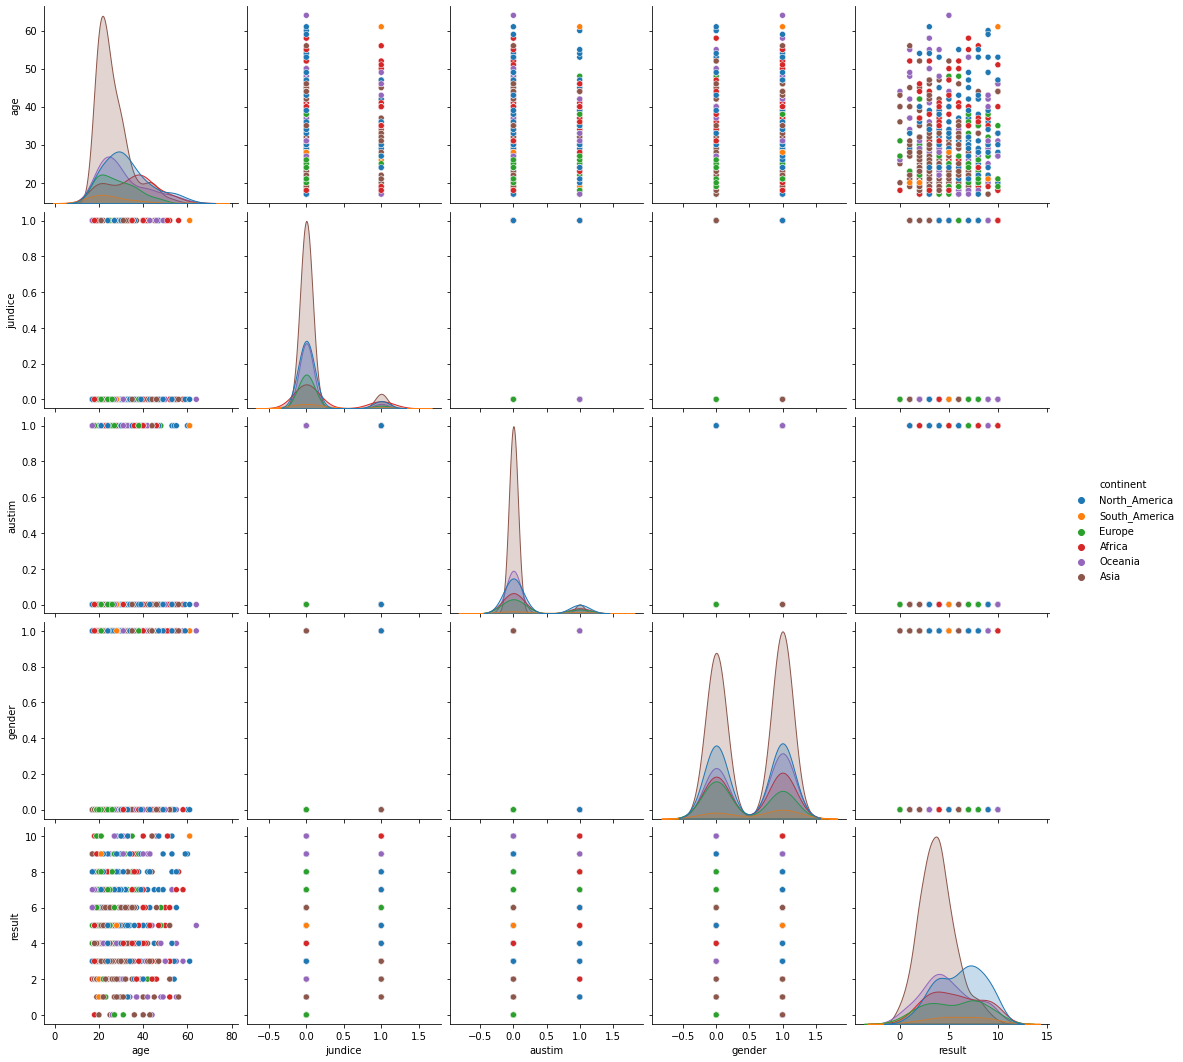

In [ ]:
import seaborn as sns
sns.pairplot(autism6,hue="continent", height=3, diag_kind="kde")

ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
autism6["continent"] = labelencoder.fit_transform(autism6["continent"])
continent = pd.DataFrame({'continent': ['North_America', 'South_America', 'Europe', 'Africa', 'Oceania','Asia']})
autism6.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,jundice,austim,gender,result,continent
0,26.0,0,0,0,6,3
1,24.0,0,1,1,5,5
2,27.0,1,1,1,8,2
3,35.0,0,1,0,6,3
4,40.0,0,0,0,2,0


In [ ]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
autism6 = create_dummies(autism6,"continent")

autism6.head()

,age,jundice,austim,gender,result,continent,continent_0,continent_1,continent_2,continent_3,continent_4,continent_5
0,26.0,0,0,0,6,3,0,0,0,1,0,0
1,24.0,0,1,1,5,5,0,0,0,0,0,1
2,27.0,1,1,1,8,2,0,0,1,0,0,0
3,35.0,0,1,0,6,3,0,0,0,1,0,0
4,40.0,0,0,0,2,0,1,0,0,0,0,0


Standardizing the Data

In [ ]:
unscaled_features = autism5[['age','jundice','austim','gender' ,'result']]

 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


unscaled_features_array = sc.fit_transform(unscaled_features.values)

scaled_features = pd.DataFrame(unscaled_features_array, index=unscaled_features.index, columns=unscaled_features.columns)

scaled_features.head()

,age,jundice,austim,gender,result
0,-0.329123,-0.330420,-0.386239,-1.045245,0.445624
1,-0.535211,-0.330420,2.589073,0.956713,0.044620
2,-0.226079,3.026453,2.589073,0.956713,1.247634
3,0.598272,-0.330420,2.589073,-1.045245,0.445624
4,1.113492,-0.330420,-0.386239,-1.045245,-1.158395


Splitting the data into Training and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X = scaled_features
y = autism6['continent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [ ]:
from sklearn.neural_network import MLPClassifier



mlp1 = MLPClassifier(verbose=1)

In [ ]:
mlp1.fit(X_train, y_train)

Iteration 1, loss = 1.87382865
Iteration 2, loss = 1.83752800
Iteration 3, loss = 1.80345120
Iteration 4, loss = 1.77201979
Iteration 5, loss = 1.74189264
Iteration 6, loss = 1.71354273
Iteration 7, loss = 1.68733709
Iteration 8, loss = 1.66204196
Iteration 9, loss = 1.63755336
Iteration 10, loss = 1.61572998
Iteration 11, loss = 1.59438441
Iteration 12, loss = 1.57478151
Iteration 13, loss = 1.55622282
Iteration 14, loss = 1.53930547
Iteration 15, loss = 1.52325617
Iteration 16, loss = 1.50844826
Iteration 17, loss = 1.49542127
Iteration 18, loss = 1.48327025
Iteration 19, loss = 1.47152307
Iteration 20, loss = 1.46226279
Iteration 21, loss = 1.45348329
Iteration 22, loss = 1.44526173
Iteration 23, loss = 1.43821723
Iteration 24, loss = 1.43202343
Iteration 25, loss = 1.42628987
Iteration 26, loss = 1.42123593
Iteration 27, loss = 1.41692379
Iteration 28, loss = 1.41297054
Iteration 29, loss = 1.40936072
Iteration 30, loss = 1.40624125
Iteration 31, loss = 1.40310700
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(verbose=1)

In [ ]:
print (mlp1.score(X_test,y_test))

0.43103448275862066


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


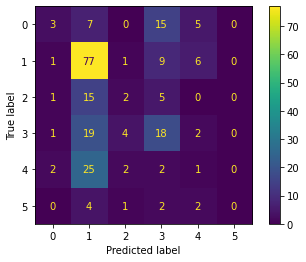

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp1, X_test, y_test)

In [ ]:
y_pred = mlp1.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 [1 1 3 1 5 5 2 3 1 3 3 1 3 3 1 1 0 3 1 1 1 1 0 2 1 0 1 1 1 1 1 3 1 1 1 1 1
 1 1 3 4 3 1 1 1 1 1 1 1 1 3 1 3 1 1 1 5 1 1 1 1 1 2 2 1 1 1 1 1 3 2 1 1 3
 1 1 1 1 1 2 1 1 1 1 1 1 1 4 0 1 1 1 2 1 1 3 1 1 1 1 3 1 1 2 1 1 1 1 1 3 1
 1 2 1 3 1 1 3 1 1 3 1 1 3 1 1 2 1 0 1 1 1 1 1 1 1 3 0 3 1 3 1 3 1 2 0 1 1
 3 1 3 3 1 1 1 2 1 3 1 1 1 1 2 0 1 4 3 1 1 1 3 1 2 2 1 1 3 2 0 3 1 1 1 3 3
 3 2 0 1 1 3 3 3 4 1 3 0 1 1 1 1 1 1 3 1 3 1 0 3 0 1 1 1 3 1 1 1 3 1 1 1 3
 1 1 3 1 3 1 1 1 1 1]


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.12      0.15        26
           1       0.50      0.85      0.63        87
           2       0.24      0.17      0.20        23
           3       0.35      0.36      0.36        47
           4       0.50      0.05      0.09        41
           5       0.00      0.00      0.00         8

    accuracy                           0.43       232
   macro avg       0.30      0.26      0.24       232
weighted avg       0.40      0.43      0.36       232



MLP 2 

In [ ]:
mlp2 = MLPClassifier(hidden_layer_sizes=10,solver='sgd',learning_rate_init= 0.01, max_iter=500, verbose = 1)

In [ ]:
mlp2.fit(X_train, y_train)

Iteration 1, loss = 1.80979313
Iteration 2, loss = 1.78915896
Iteration 3, loss = 1.76040486
Iteration 4, loss = 1.72582318
Iteration 5, loss = 1.69149683
Iteration 6, loss = 1.66151333
Iteration 7, loss = 1.63005593
Iteration 8, loss = 1.60500736
Iteration 9, loss = 1.58217006
Iteration 10, loss = 1.56258304
Iteration 11, loss = 1.54553020
Iteration 12, loss = 1.53142367
Iteration 13, loss = 1.51866972
Iteration 14, loss = 1.50772473
Iteration 15, loss = 1.49819836
Iteration 16, loss = 1.48955247
Iteration 17, loss = 1.48162925
Iteration 18, loss = 1.47488189
Iteration 19, loss = 1.46831332
Iteration 20, loss = 1.46298699
Iteration 21, loss = 1.45769080
Iteration 22, loss = 1.45303157
Iteration 23, loss = 1.44866745
Iteration 24, loss = 1.44484095
Iteration 25, loss = 1.44116637
Iteration 26, loss = 1.43818553
Iteration 27, loss = 1.43516333
Iteration 28, loss = 1.43259077
Iteration 29, loss = 1.43027311
Iteration 30, loss = 1.42826752
Iteration 31, loss = 1.42590932
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=10, learning_rate_init=0.01, max_iter=500,
              solver='sgd', verbose=1)

In [ ]:
print (mlp2.score(X_test,y_test))

0.4267241379310345


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


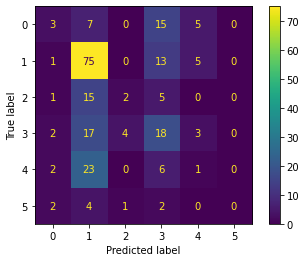

In [ ]:
plot_confusion_matrix(mlp2, X_test, y_test)

In [ ]:
y_pred = mlp2.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 [1 3 4 1 0 1 3 1 1 3 1 1 3 4 1 3 3 1 1 3 1 1 1 4 1 1 1 1 3 3 3 1 1 3 1 1 1
 1 4 3 1 1 1 1 1 1 3 1 1 3 3 1 1 1 1 1 1 2 3 1 3 1 1 1 4 1 1 1 1 1 1 1 1 1
 0 1 3 3 3 3 0 3 1 3 0 1 3 1 1 1 1 1 0 3 1 1 1 1 1 1 3 1 3 1 1 0 3 3 1 2 0
 1 3 1 4 3 4 1 4 3 3 1 3 1 3 1 1 1 1 1 3 3 1 1 3 1 1 1 1 3 1 1 0 1 1 1 2 2
 1 3 1 1 1 3 3 1 0 1 3 4 1 1 1 1 1 3 1 1 1 1 1 3 3 1 1 1 1 1 0 1 1 4 3 3 3
 1 1 1 3 1 0 3 1 1 1 3 1 1 1 4 1 1 1 3 1 2 1 3 4 3 3 1 1 1 1 1 2 4 3 1 1 1
 1 3 4 2 1 1 1 1 1 3]


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.10      0.15        30
           1       0.53      0.80      0.64        94
           2       0.29      0.09      0.13        23
           3       0.31      0.41      0.35        44
           4       0.07      0.03      0.04        32
           5       0.00      0.00      0.00         9

    accuracy                           0.43       232
   macro avg       0.24      0.24      0.22       232
weighted avg       0.35      0.43      0.36       232



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mlp3 = MLPClassifier(hidden_layer_sizes=80,solver='sgd',learning_rate_init= 0.0001, max_iter=1000, verbose = 1)

In [ ]:
mlp3.fit(X_train, y_train)

Iteration 1, loss = 1.84391287
Iteration 2, loss = 1.84348184
Iteration 3, loss = 1.84281842
Iteration 4, loss = 1.84195735
Iteration 5, loss = 1.84097723
Iteration 6, loss = 1.83990717
Iteration 7, loss = 1.83877128
Iteration 8, loss = 1.83758364
Iteration 9, loss = 1.83639444
Iteration 10, loss = 1.83515309
Iteration 11, loss = 1.83391713
Iteration 12, loss = 1.83265397
Iteration 13, loss = 1.83139640
Iteration 14, loss = 1.83016304
Iteration 15, loss = 1.82888726
Iteration 16, loss = 1.82761166
Iteration 17, loss = 1.82635118
Iteration 18, loss = 1.82509317
Iteration 19, loss = 1.82384847
Iteration 20, loss = 1.82260798
Iteration 21, loss = 1.82135621
Iteration 22, loss = 1.82014570
Iteration 23, loss = 1.81892172
Iteration 24, loss = 1.81769822
Iteration 25, loss = 1.81646539
Iteration 26, loss = 1.81526911
Iteration 27, loss = 1.81406463
Iteration 28, loss = 1.81286844
Iteration 29, loss = 1.81167375
Iteration 30, loss = 1.81048204
Iteration 31, loss = 1.80929108
Iteration 32, los

MLPClassifier(hidden_layer_sizes=80, learning_rate_init=0.0001, max_iter=1000,
              solver='sgd', verbose=1)

In [ ]:
print (mlp3.score(X_test,y_test))

0.4396551724137931


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


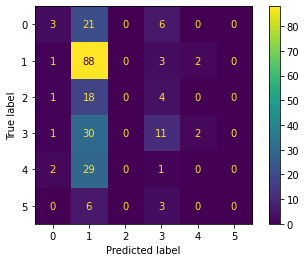

In [ ]:
plot_confusion_matrix(mlp3, X_test, y_test)

In [ ]:
y_pred = mlp3.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 [1 1 1 1 0 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1
 1 3 1 1 1 1 1 3 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 3 1 1 1 4 1 1 1 1 1 1 1 1 1
 0 3 1 1 1 1 0 3 1 1 0 1 3 1 1 1 1 1 0 4 1 1 1 1 1 1 1 1 1 1 1 0 3 1 1 1 1
 1 3 1 3 1 1 1 1 3 3 1 3 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 3 1 1 4 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1
 1 3 4 1 1 1 1 1 1 1]


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.10      0.16        30
           1       0.46      0.94      0.62        94
           2       0.00      0.00      0.00        23
           3       0.39      0.25      0.31        44
           4       0.00      0.00      0.00        32
           5       0.00      0.00      0.00         9

    accuracy                           0.44       232
   macro avg       0.20      0.21      0.18       232
weighted avg       0.31      0.44      0.33       232



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Interpretation**

The gradient descent helps us to improve the logistic and multiple regression by giving us the opportunity to find the best possible prediction using minimum amount of iterations. It does this by us of learning step and the combination of layers and other parameters which makes the process efficient and the regression optimal.

As we can see we computed three distinct versions of Multiperceptor Classifiers which are Mlp1, Mlp2 and Mlp3 respectively. The first version,  Mlp1 with the default parameters gave us the reports with 43% accuracy. The second version, Mlp2(with the parameters: hidden_layer_sizes=10,solver='sgd',learning_rate_init= 0.01, max_iter=500 resulted in the accuracy of 41%, which is actually lower than the previous version. In the final version, Mlp3 when I put the parameters as hidden_layer_sizes=80,solver='sgd',learning_rate_init= 0.0001, max_iter=1000, verbose = 1 , it resulted in the accuracy of 47% which showed us this to be the best version and combination of the parameters. Using the solvers ‘lbfgs’, ‘adam’ actually gave us lower accuracy than solver sgd. 